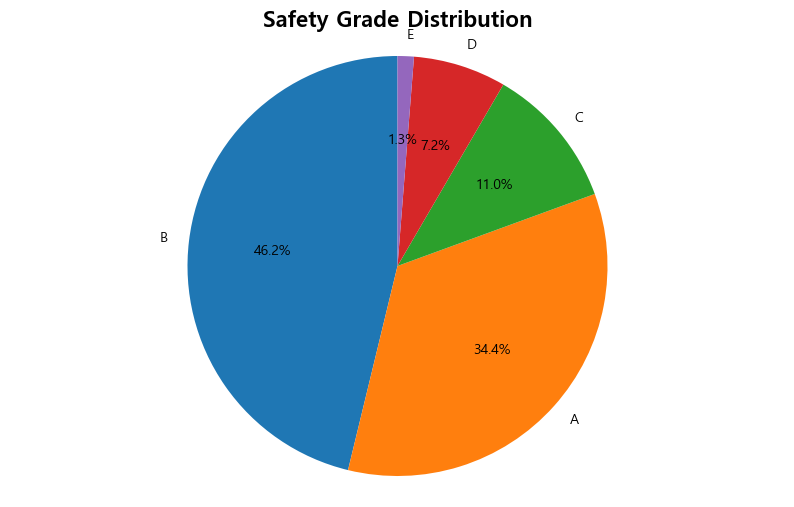

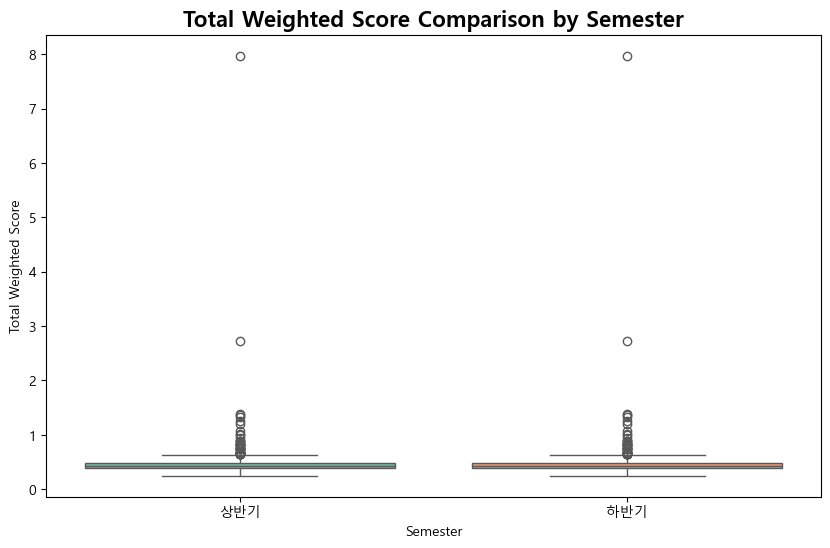

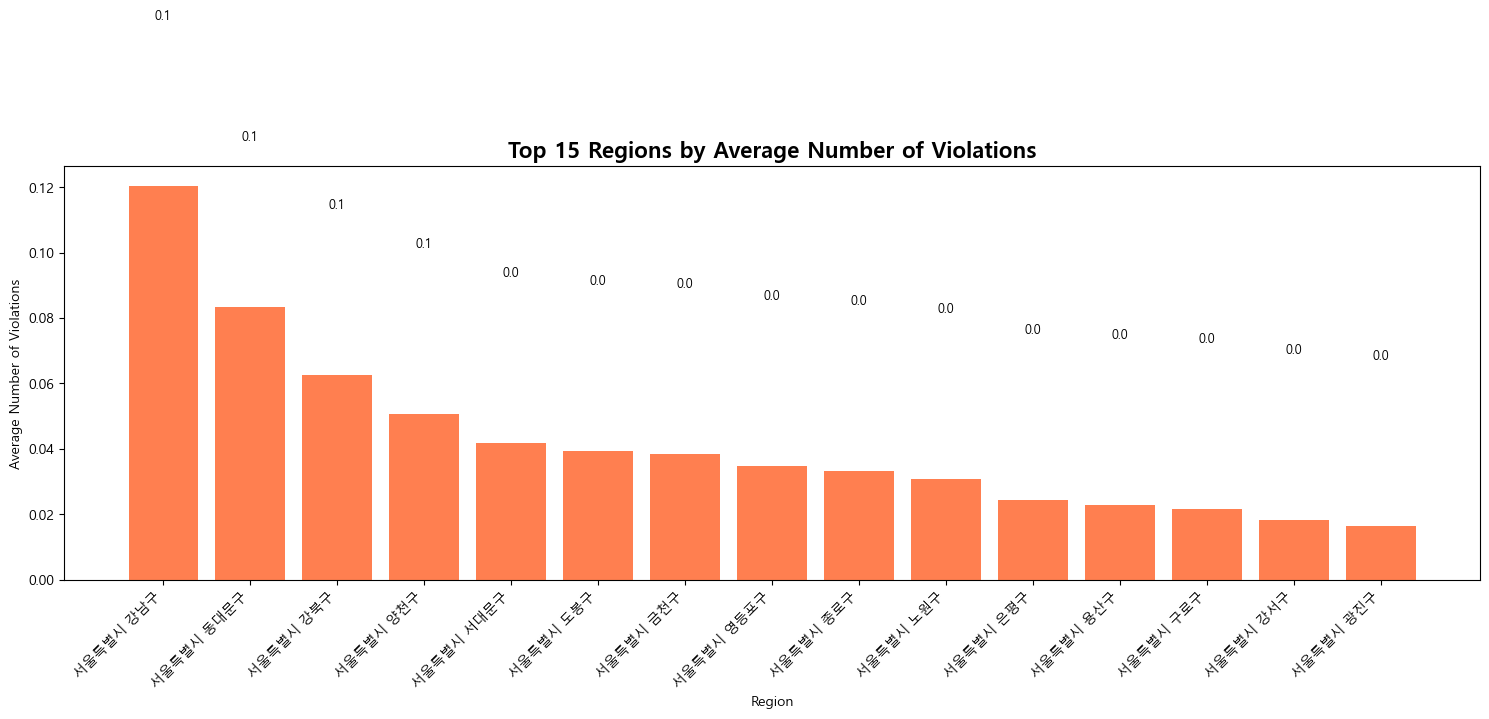

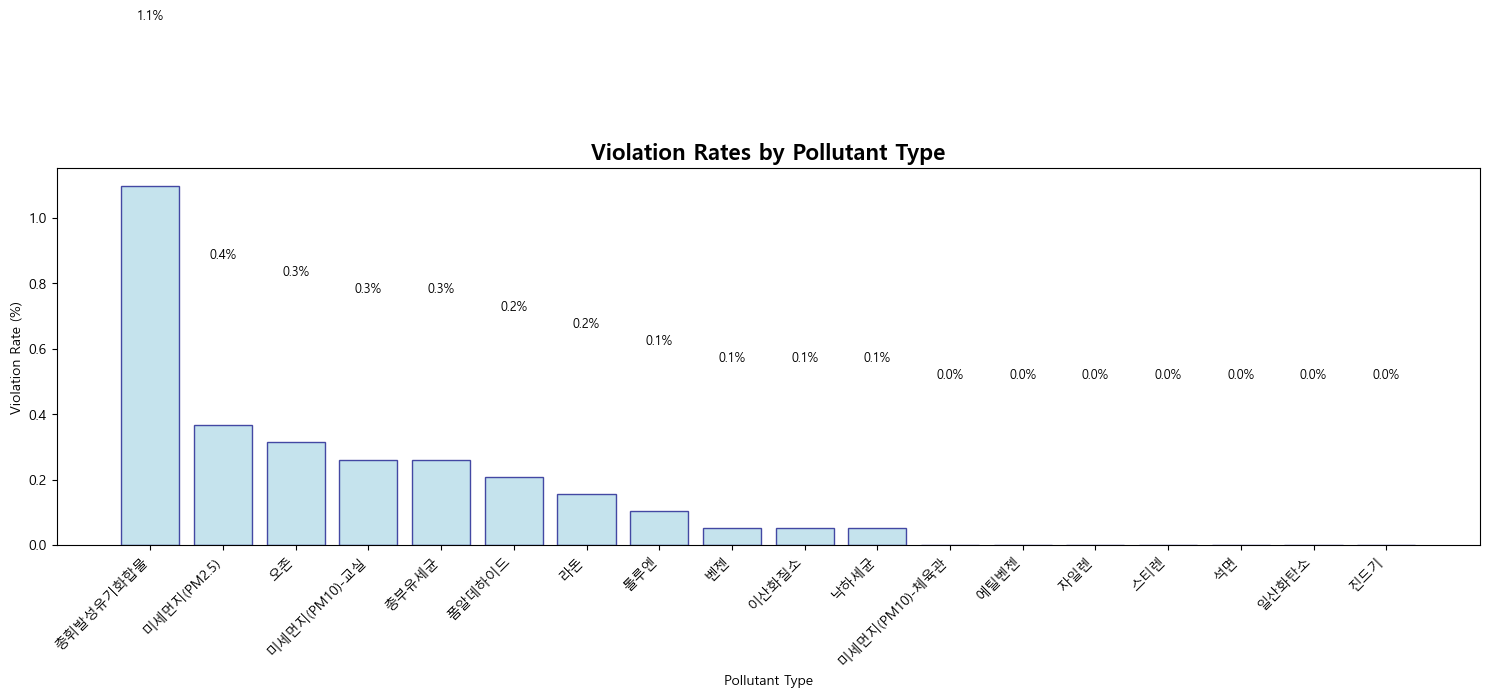

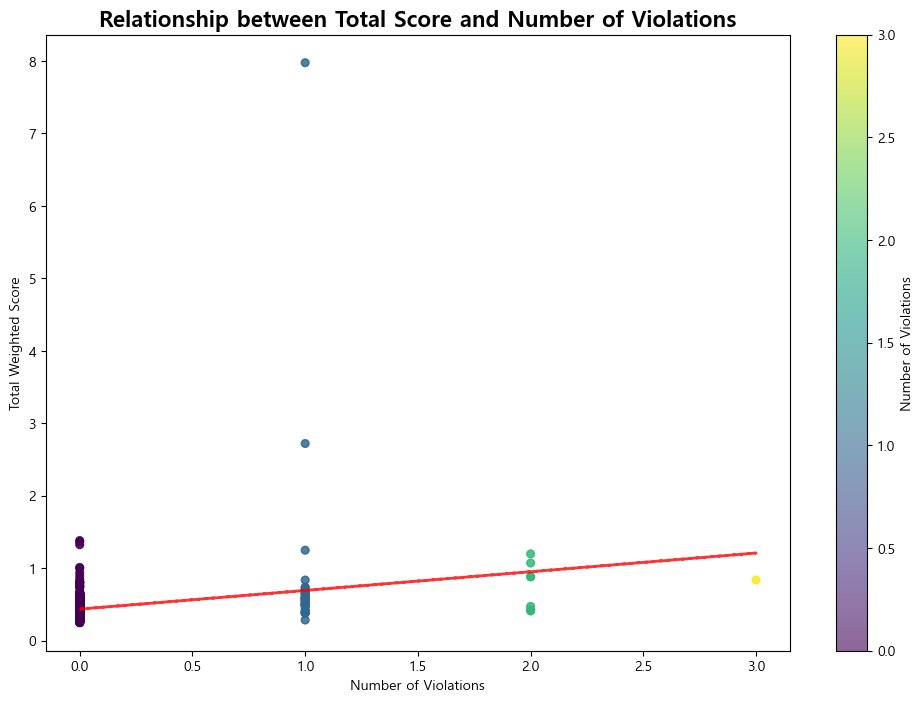

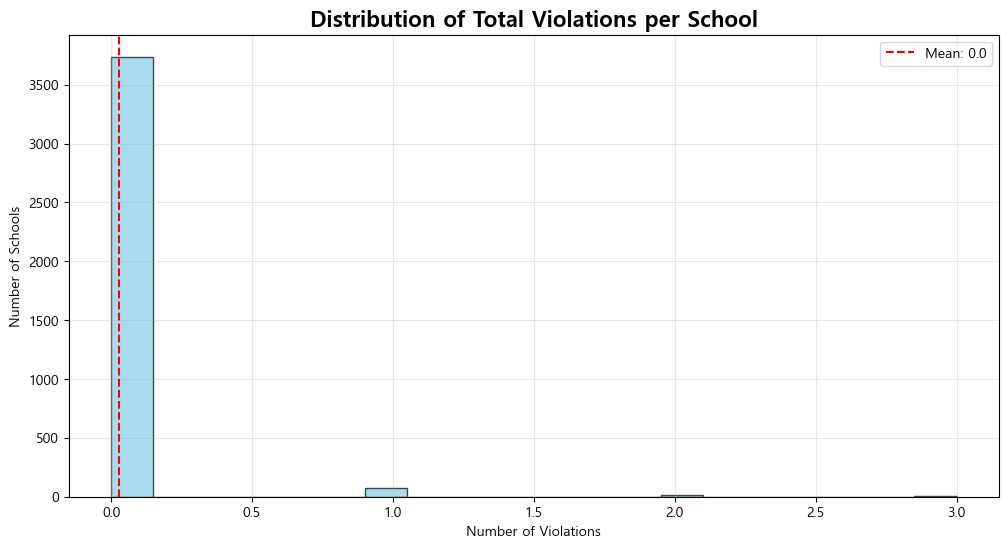

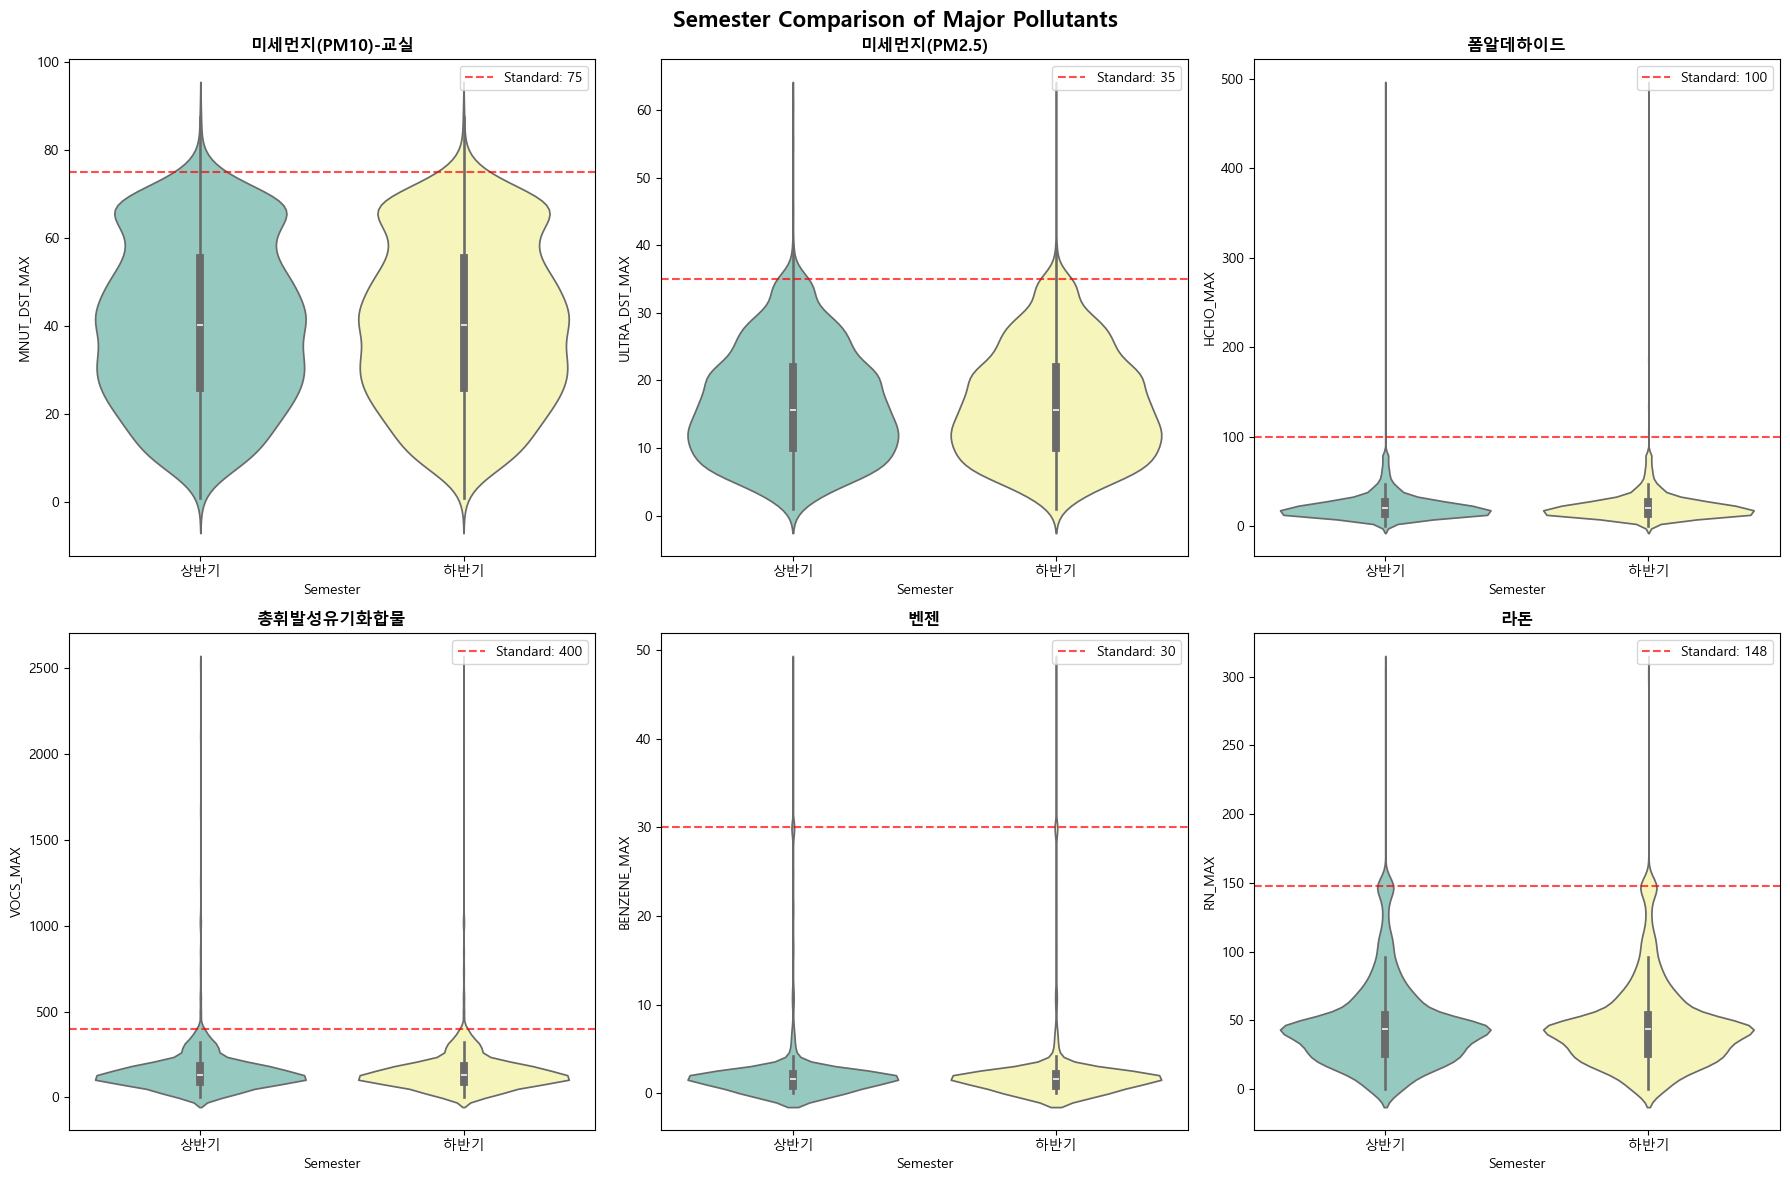

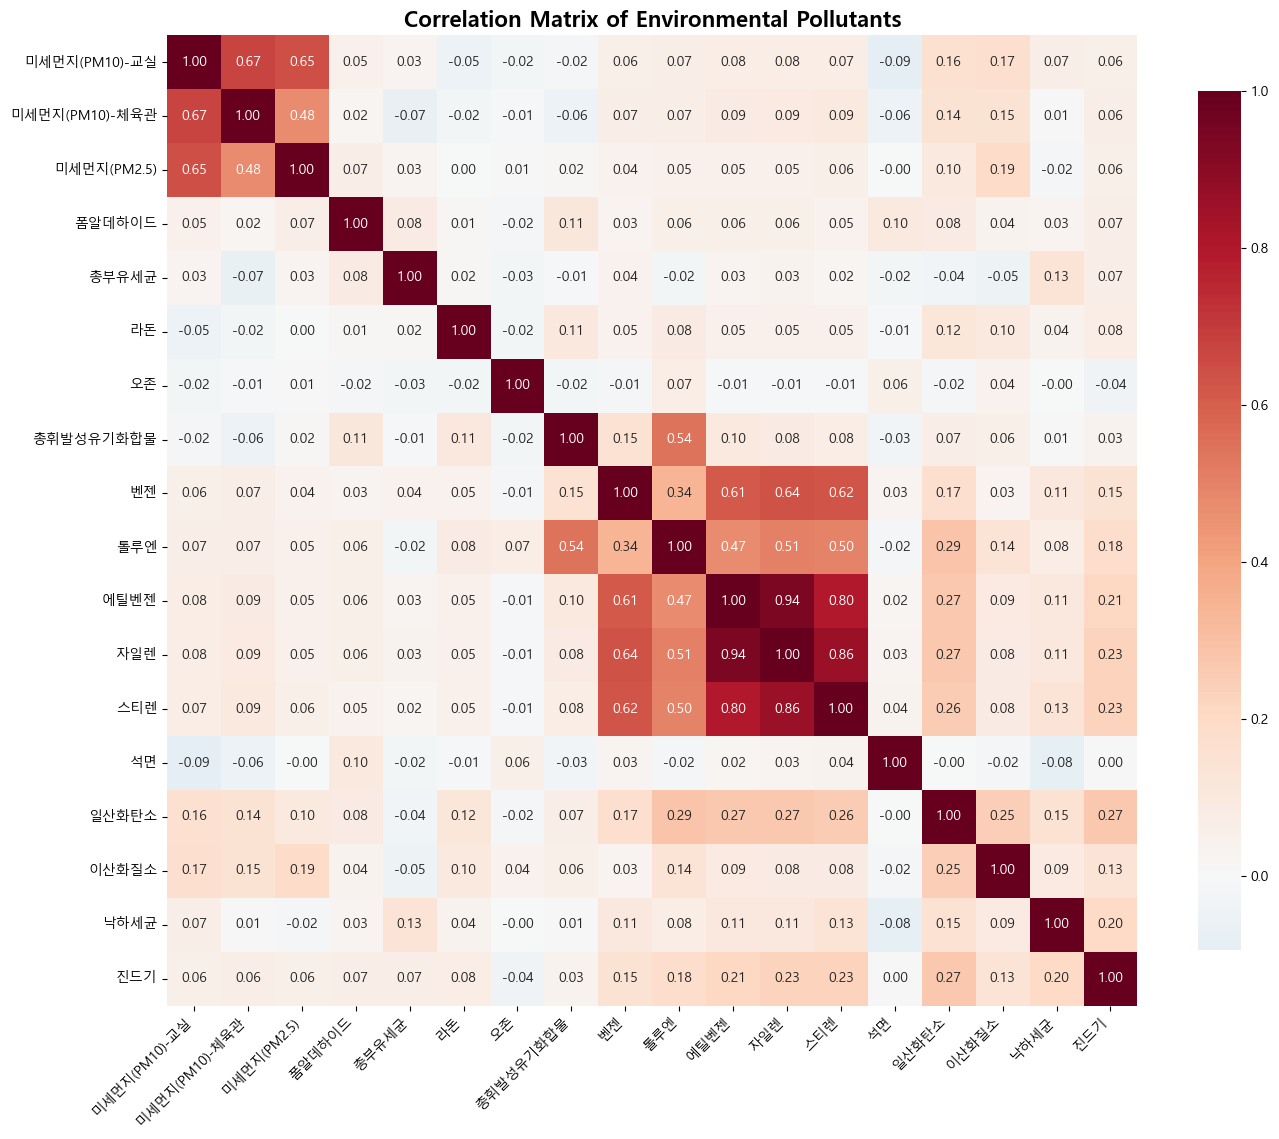

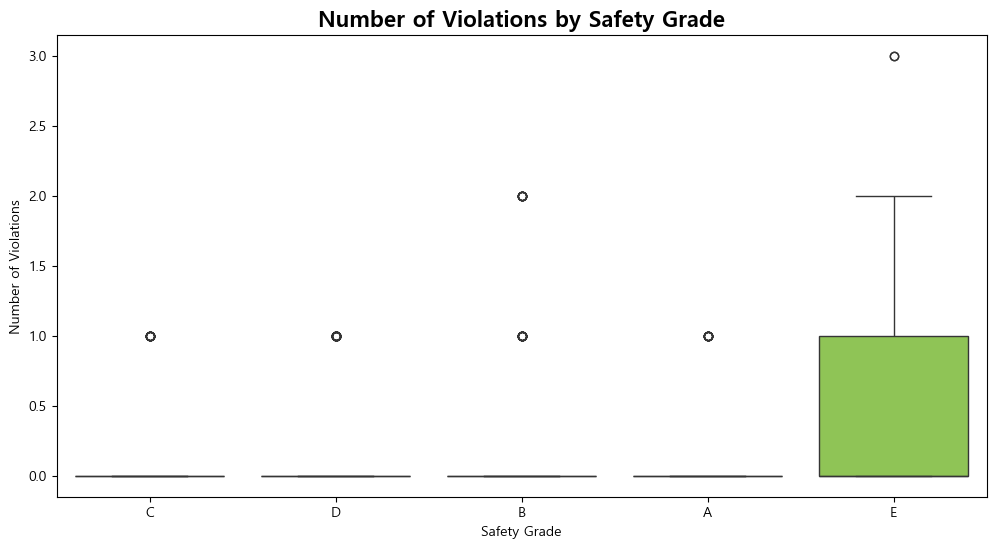

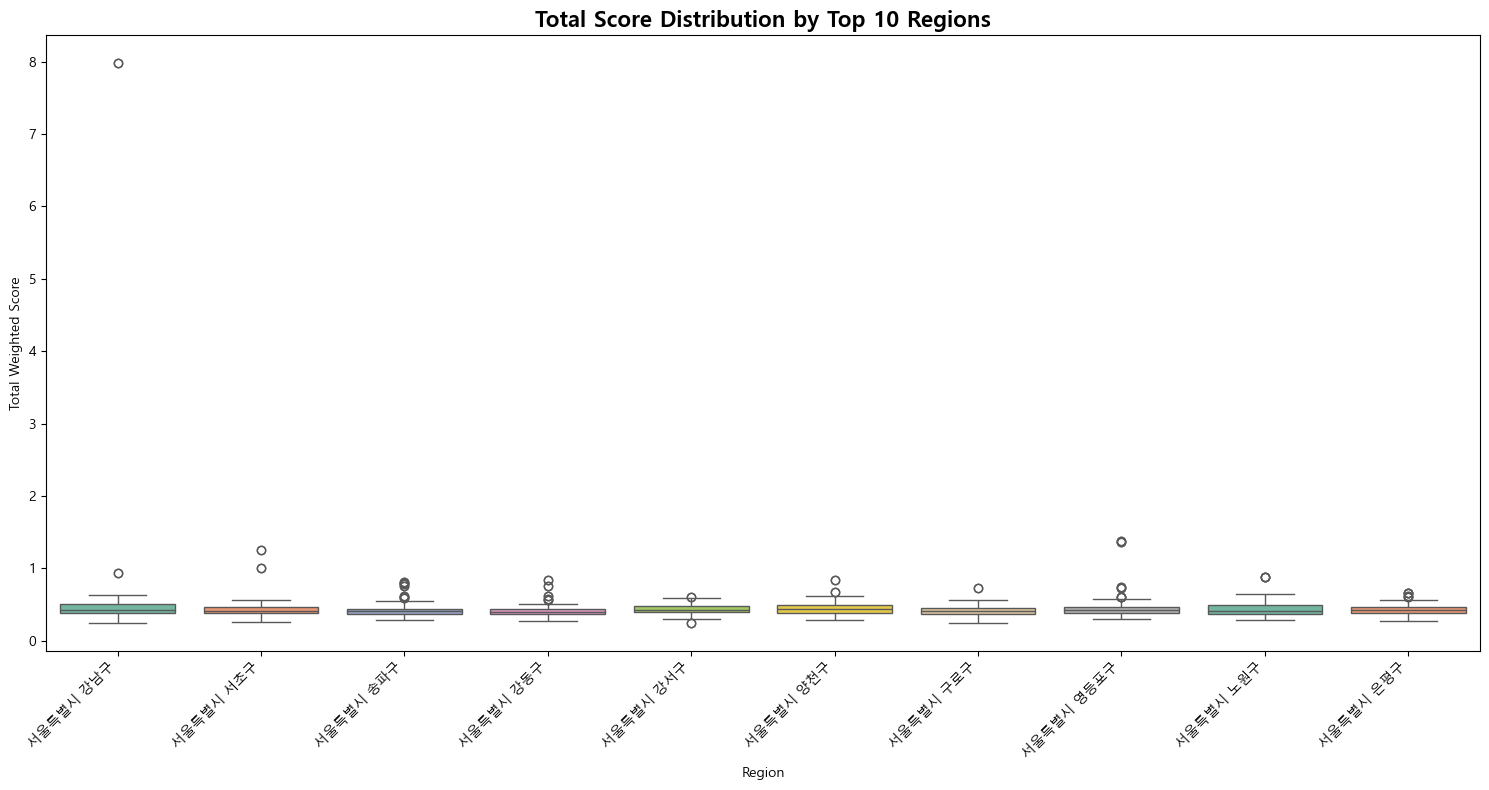

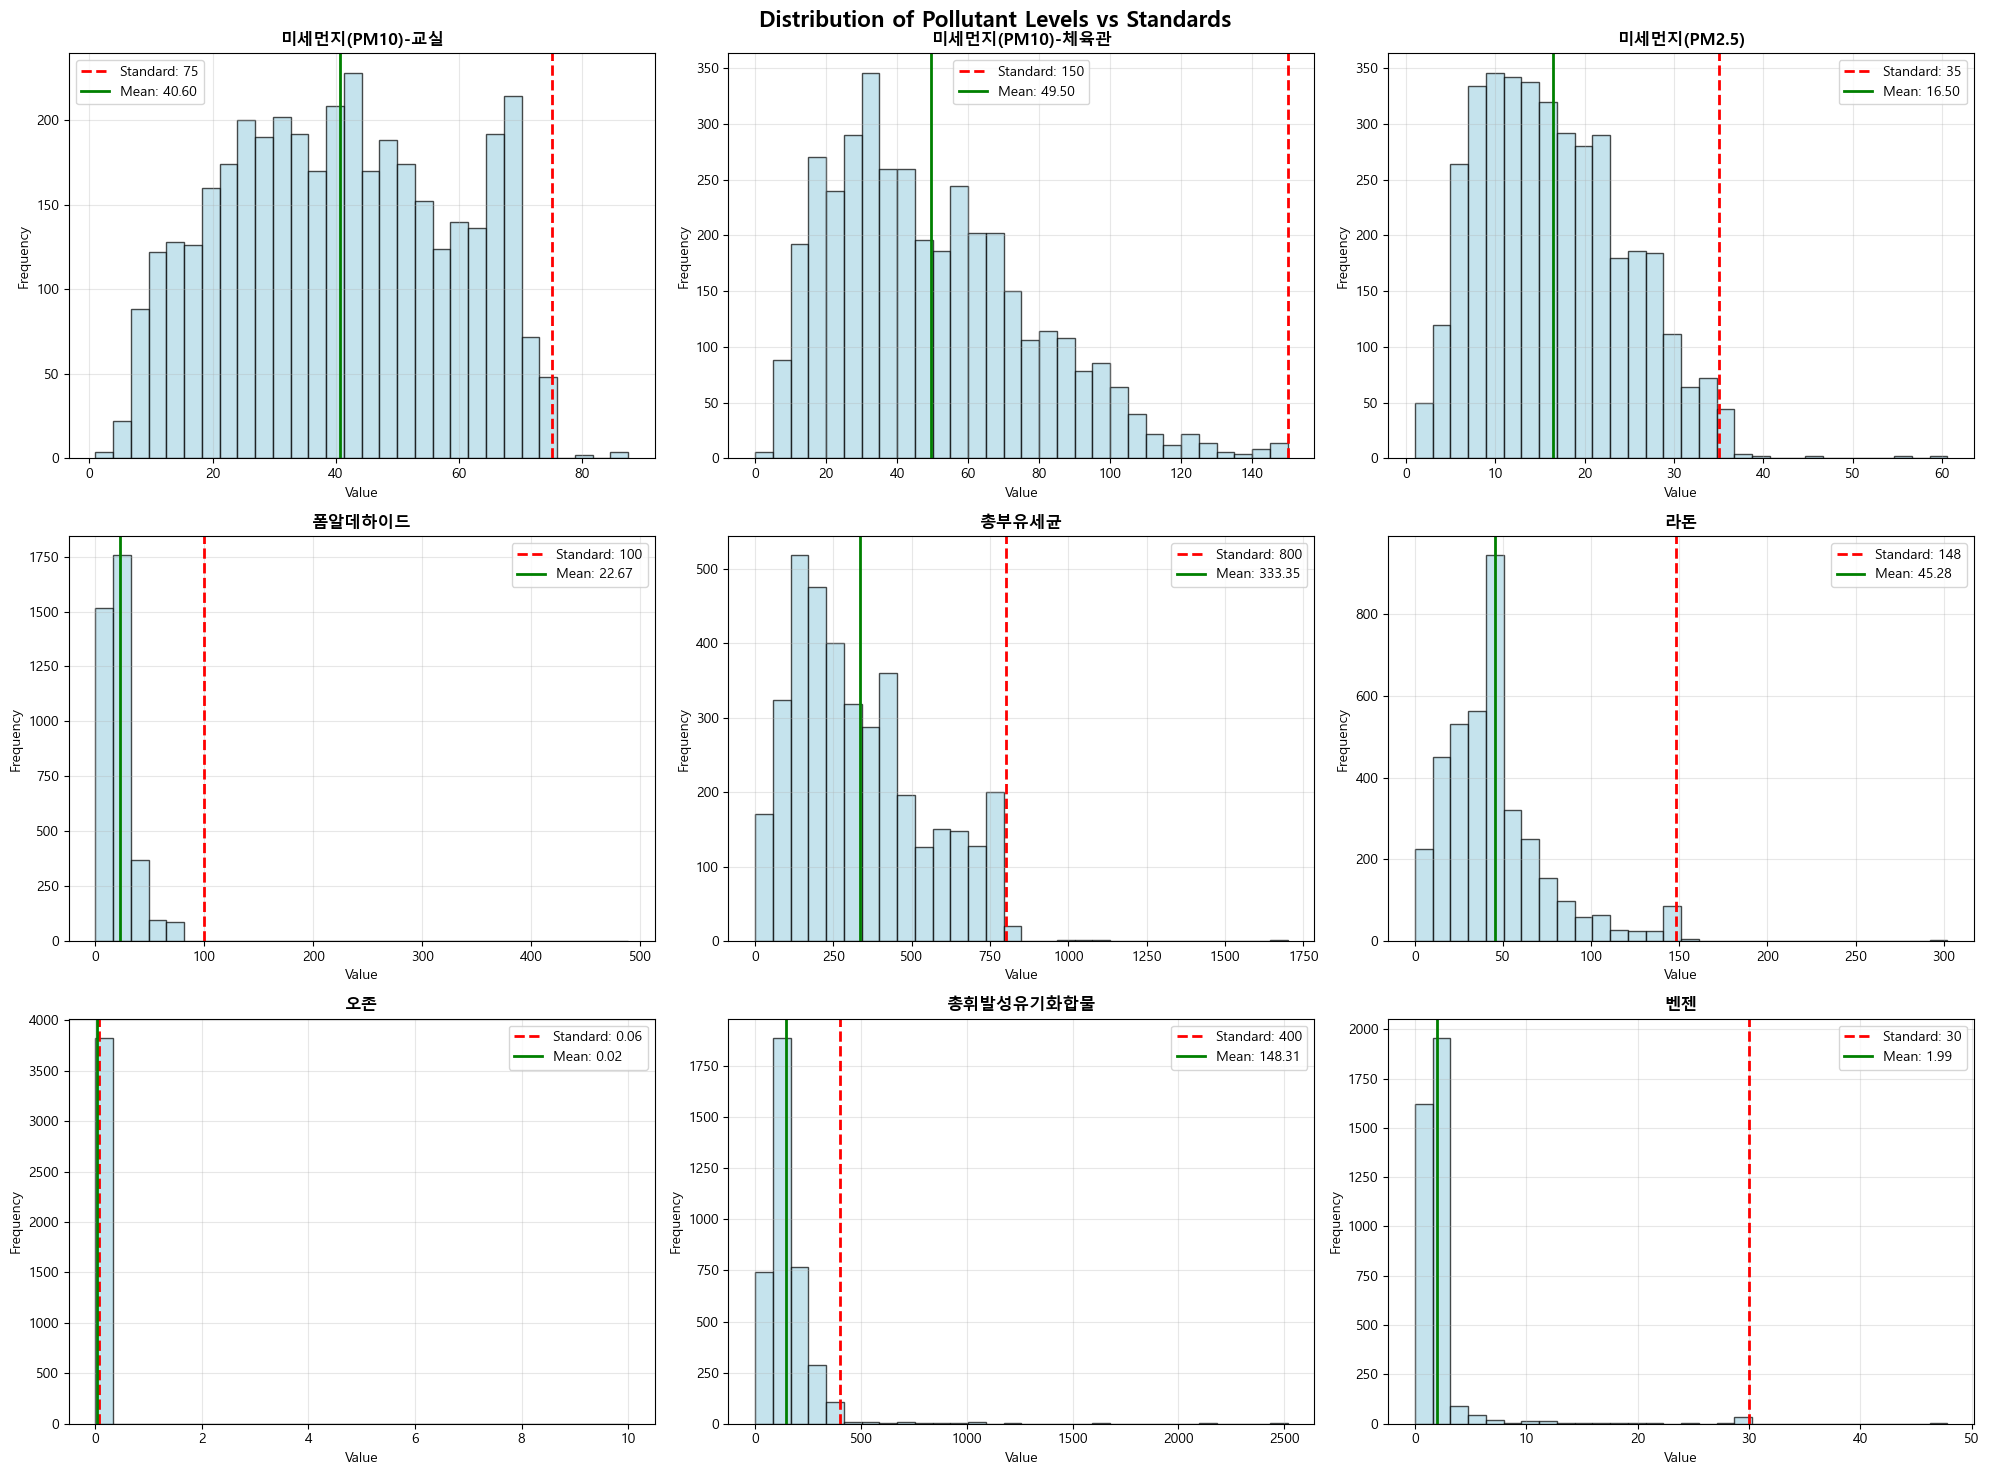

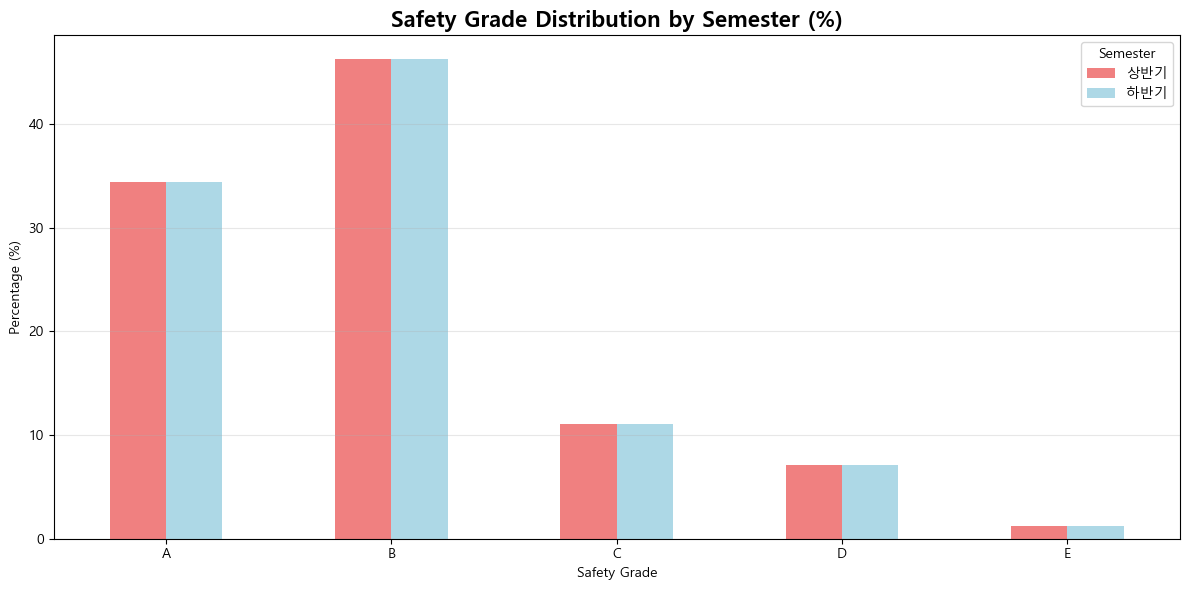

모든 시각화가 완료되었습니다!
총 3830개의 데이터로 12개의 그래프를 생성했습니다.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 정상 수치 기준값
normal_standards = {
    'MNUT_DST_MAX': 75,  # 미세먼지(PM10)-교실
    'GMNSM_MNUT_DST_MAX': 150,  # 미세먼지(PM10)-체육관
    'ULTRA_DST_MAX': 35,  # 미세먼지(PM2.5)
    'HCHO_MAX': 100,  # 폼알데하이드
    'AIR_BACT_MAX': 800,  # 총부유세균
    'RN_MAX': 148,  # 라돈
    'O3_MAX': 0.06,  # 오존
    'VOCS_MAX': 400,  # 총휘발성유기화합물
    'BENZENE_MAX': 30,  # 벤젠
    'TOLUENE_MAX': 1000,  # 톨루엔
    'ETHY_BENZENE_MAX': 360,  # 에틸벤젠
    'XYLENE_MAX': 700,  # 자일렌
    'STYLENE_MAX': 300,  # 스티렌
    'ASBESTOS_MAX': 0.01,  # 석면
    'CO_MAX': 10,  # 일산화탄소
    'NO2_MAX': 0.05,  # 이산화질소
    'FALL_BACT_MAX': 10,  # 낙하세균
    'MITE_MAX': 100  # 진드기
}

# 한글 변수명 매핑
korean_names = {
    'MNUT_DST_MAX': '미세먼지(PM10)-교실',
    'GMNSM_MNUT_DST_MAX': '미세먼지(PM10)-체육관',
    'ULTRA_DST_MAX': '미세먼지(PM2.5)',
    'HCHO_MAX': '폼알데하이드',
    'AIR_BACT_MAX': '총부유세균',
    'RN_MAX': '라돈',
    'O3_MAX': '오존',
    'VOCS_MAX': '총휘발성유기화합물',
    'BENZENE_MAX': '벤젠',
    'TOLUENE_MAX': '톨루엔',
    'ETHY_BENZENE_MAX': '에틸벤젠',
    'XYLENE_MAX': '자일렌',
    'STYLENE_MAX': '스티렌',
    'ASBESTOS_MAX': '석면',
    'CO_MAX': '일산화탄소',
    'NO2_MAX': '이산화질소',
    'FALL_BACT_MAX': '낙하세균',
    'MITE_MAX': '진드기'
}

# 데이터 로드
df_first = pd.read_csv('../1.Data/processed/환경위생/환경위생_통합점수_최종처리_개선_상반기.csv', encoding='utf-8')
df_second = pd.read_csv('../1.Data/processed/환경위생/환경위생_통합점수_최종처리_개선_상반기.csv', encoding='utf-8')

# 반기 구분 컬럼 추가
df_first['반기'] = '상반기'
df_second['반기'] = '하반기'

# 전체 데이터 결합
df_combined = pd.concat([df_first, df_second], ignore_index=True)

# 위반 플래그 생성
for col, standard in normal_standards.items():
    if col in df_combined.columns:
        violation_col = f"{col}_VIOLATION"
        df_combined[violation_col] = df_combined[col] > standard

# 총 위반 항목 수
violation_cols = [col for col in df_combined.columns if col.endswith('_VIOLATION')]
df_combined['TOTAL_VIOLATIONS'] = df_combined[violation_cols].sum(axis=1)

# ===== 그래프 1: 안전등급 분포 =====
plt.figure(figsize=(10, 6))
safety_grade_counts = df_combined['SAFETY_GRADE'].value_counts()
plt.pie(safety_grade_counts.values, labels=safety_grade_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Safety Grade Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# ===== 그래프 2: 상반기 vs 하반기 총점 비교 박스플롯 =====
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='반기', y='TOTAL_WEIGHTED_SCORE', palette='Set2')
plt.title('Total Weighted Score Comparison by Semester', fontsize=16, fontweight='bold')
plt.ylabel('Total Weighted Score')
plt.xlabel('Semester')
plt.show()

# ===== 그래프 3: 지역별 평균 위반 수 (상위 15개) =====
plt.figure(figsize=(15, 8))
regional_violations = df_combined.groupby('ADRCD_NM')['TOTAL_VIOLATIONS'].mean().sort_values(ascending=False).head(15)
bars = plt.bar(range(len(regional_violations)), regional_violations.values, color='coral')
plt.title('Top 15 Regions by Average Number of Violations', fontsize=16, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Number of Violations')
plt.xticks(range(len(regional_violations)), regional_violations.index, rotation=45, ha='right')

# 막대 위에 값 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ===== 그래프 4: 주요 오염물질별 위반율 =====
plt.figure(figsize=(15, 8))
violation_rates = []
labels = []

for col in violation_cols:
    original_col = col.replace('_VIOLATION', '')
    if original_col in korean_names:
        rate = (df_combined[col].sum() / len(df_combined)) * 100
        violation_rates.append(rate)
        labels.append(korean_names[original_col])

# 위반율 순으로 정렬
sorted_data = sorted(zip(labels, violation_rates), key=lambda x: x[1], reverse=True)
labels, violation_rates = zip(*sorted_data)

bars = plt.bar(range(len(violation_rates)), violation_rates, color='lightblue', edgecolor='navy', alpha=0.7)
plt.title('Violation Rates by Pollutant Type', fontsize=16, fontweight='bold')
plt.xlabel('Pollutant Type')
plt.ylabel('Violation Rate (%)')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# 막대 위에 퍼센트 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ===== 그래프 5: 총점과 위반 수의 관계 산점도 =====
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_combined['TOTAL_VIOLATIONS'], df_combined['TOTAL_WEIGHTED_SCORE'], 
                     c=df_combined['TOTAL_VIOLATIONS'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Number of Violations')
plt.title('Relationship between Total Score and Number of Violations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Violations')
plt.ylabel('Total Weighted Score')

# 추세선 추가
z = np.polyfit(df_combined['TOTAL_VIOLATIONS'], df_combined['TOTAL_WEIGHTED_SCORE'], 1)
p = np.poly1d(z)
plt.plot(df_combined['TOTAL_VIOLATIONS'], p(df_combined['TOTAL_VIOLATIONS']), "r--", alpha=0.8, linewidth=2)
plt.show()

# ===== 그래프 6: 위반 항목 수 분포 히스토그램 =====
plt.figure(figsize=(12, 6))
plt.hist(df_combined['TOTAL_VIOLATIONS'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Violations per School', fontsize=16, fontweight='bold')
plt.xlabel('Number of Violations')
plt.ylabel('Number of Schools')
plt.axvline(df_combined['TOTAL_VIOLATIONS'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df_combined["TOTAL_VIOLATIONS"].mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ===== 그래프 7: 상반기 vs 하반기 주요 오염물질 비교 =====
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

main_pollutants = ['MNUT_DST_MAX', 'ULTRA_DST_MAX', 'HCHO_MAX', 'VOCS_MAX', 'BENZENE_MAX', 'RN_MAX']

for i, col in enumerate(main_pollutants[:6]):
    if col in df_combined.columns:
        df_plot = df_combined[[col, '반기']].dropna()
        sns.violinplot(data=df_plot, x='반기', y=col, ax=axes[i], palette='Set3')
        
        # 정상 수치 기준선 추가
        if col in normal_standards:
            axes[i].axhline(y=normal_standards[col], color='red', linestyle='--', alpha=0.7, 
                          label=f'Standard: {normal_standards[col]}')
            axes[i].legend()
        
        axes[i].set_title(f'{korean_names.get(col, col)}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Semester')

plt.suptitle('Semester Comparison of Major Pollutants', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== 그래프 8: 오염물질 간 상관관계 히트맵 =====
plt.figure(figsize=(14, 12))
max_cols = [col for col in df_combined.columns if col.endswith('_MAX') and col in normal_standards.keys()]
corr_matrix = df_combined[max_cols].corr()

# 한글 라벨로 변경
korean_labels = [korean_names.get(col, col) for col in max_cols]
corr_matrix.index = korean_labels
corr_matrix.columns = korean_labels

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, square=True, 
           fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Environmental Pollutants', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ===== 그래프 9: 안전등급별 위반 수 박스플롯 =====
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined, x='SAFETY_GRADE', y='TOTAL_VIOLATIONS', palette='viridis')
plt.title('Number of Violations by Safety Grade', fontsize=16, fontweight='bold')
plt.xlabel('Safety Grade')
plt.ylabel('Number of Violations')
plt.show()

# ===== 그래프 10: 지역별 총점 분포 (상위 10개 지역) =====
plt.figure(figsize=(15, 8))
top_regions = df_combined['ADRCD_NM'].value_counts().head(10).index
df_top_regions = df_combined[df_combined['ADRCD_NM'].isin(top_regions)]

sns.boxplot(data=df_top_regions, x='ADRCD_NM', y='TOTAL_WEIGHTED_SCORE', palette='Set2')
plt.title('Total Score Distribution by Top 10 Regions', fontsize=16, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Weighted Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ===== 그래프 11: 주요 오염물질의 정상수치 대비 현황 =====
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

selected_pollutants = list(normal_standards.keys())[:9]

for i, col in enumerate(selected_pollutants):
    if col in df_combined.columns:
        data = df_combined[col].dropna()
        standard = normal_standards[col]
        
        # 히스토그램
        axes[i].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        axes[i].axvline(standard, color='red', linestyle='--', linewidth=2, 
                       label=f'Standard: {standard}')
        axes[i].axvline(data.mean(), color='green', linestyle='-', linewidth=2, 
                       label=f'Mean: {data.mean():.2f}')
        
        axes[i].set_title(f'{korean_names.get(col, col)}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribution of Pollutant Levels vs Standards', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== 그래프 12: 반기별 안전등급 분포 비교 =====
plt.figure(figsize=(12, 6))
grade_semester = pd.crosstab(df_combined['SAFETY_GRADE'], df_combined['반기'])
grade_semester_pct = grade_semester.div(grade_semester.sum(axis=0), axis=1) * 100

grade_semester_pct.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Safety Grade Distribution by Semester (%)', fontsize=16, fontweight='bold')
plt.xlabel('Safety Grade')
plt.ylabel('Percentage (%)')
plt.legend(title='Semester')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("모든 시각화가 완료되었습니다!")
print(f"총 {len(df_combined)}개의 데이터로 12개의 그래프를 생성했습니다.")